In [ ]:
#@title Librerías 
import numpy as np
import scipy.fft as sft
import matplotlib.pyplot as plt

def ftfresnel(M,N,dx,wl,z):
    
    """
    Esta funcion genera una funcion de transferencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa determina si se genera la funcion de transferencia directamente.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    FX,FY=np.meshgrid(fx,fy)
    H=np.exp(-1j*wl*z*np.pi*(FX**2+FY**2))
    H=sft.fftshift(H)
    return H

def irfresnel(M,N,dx,wl,z):
    
    """
    Esta funcion genera una funcion de tranfserencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa genera la funcion de transferencia por medio de la respuesta al impulso en base a los paramtros introducidos.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    X,Y=np.meshgrid(x,y)
    h=(1/(1j*wl*z))*np.exp(1j*k/(2*z)*(X**2+Y**2))
    H=sft.fft2(sft.fftshift(h))*(dx**2)  
    return H

def convft(U,H,dx):
    """
    Realiza la convolucion 2D de las matrices U,H usando la transformada rapida de Fourier. U, H deben tener la misma forma.
    
    Parameters
    ----------
    U : Array Numpy
        Uno de las matrices a convolucionar
    H : Array Numpy
        Otra de las matrices a convolucionar
    dx : Float
        Tamaño de muestreo de las funciones a convolucionar. Necesario para preservar escala.

    Returns
    -------
    U2
        Arreglo de numpy con la convolucio de U y H

    """
    U2=sft.fft2(sft.fftshift(U))*(dx**2)
    U2=H*U2
    U2=sft.ifftshift(sft.ifft2(U2)*(1/dx**2))
    return U2

def tilt(uin,L,lam,z,alpha,theta): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  '''
   tilt phasefront
   uniform sampling assumed
   uin - input field
   L - side length
   lambda - wavelength
   alpha - tilt angle --> Cuanto quiero desviar el haz. 
   theta - rotation angle (x axis 0)
   uout - output field
  '''
  N=len(u1[0,:]) 
  dx=L/N  #Muestreo 
  k=2*np.pi/lam #Número de onda
  x=np.arange(-L/2,L/2,dx)    #Sistema coord. 
  X, Y = np.meshgrid(x, x); #Espacio meshgrihd 
  uout =uin*np.exp(1j*k*(X*np.cos(theta)+Y*np.sin(theta))*np.tan(alpha))  #El producto del campo de entrada(amplitud constante) con la función exp que lleva la información del TILT
  return uout

def focus(uin,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  ''' 
   converging or diverging phase-front
   uniform sampling assumed
   uin - inputld
   L - side length
   lambda - wavelength
   zf - focal distance (+ converge, - diverge)
   uout - output field
  '''
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  #Sistema coord. 
  X, Y = np.meshgrid(x, x);
  uout =uin*np.exp(-1j*k/(2*zf)*(X**2+Y**2)) #El campo de entrada producto de la exp(fase) encontrada para enfocar 
  return uout

def propFF(u1,L1,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - FRAUNHOFER PATTERN
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  # L2 - Oobservation plane side length
  N=len(u1[0,:]) 
  dx1=L1/N
  k=2*np.pi/lam
  L2=lam*z/dx1
  dx2=lam*z/L1
  x2=np.arange(-L2/2,L2/2,dx2)  
  X2, Y2 = np.meshgrid(x2, x2);
  c=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X2**2+Y2**2))
  u2=c*np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(u1)))*dx1**2
  return u2, L2


# Solución tarea #6 & #7

## Punto 6.2: 

In [ ]:
#@title Función rect 

def rect2D(x): # FUNCION RECTANGULO EN 2D
  out = np.zeros((len(x),len(x)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(x)):
      out[cont,cont2]=int(np.abs(x[cont,cont2])<=1/2)
  return out

In [ ]:
#@title Datos del problema 
z = 2000 #[m]
zf = 4000 # [m]

alpha = 5.0e-5 #[rad]
theta = np.pi/4 # [rad]
wl = 0.5e-6 #Wave lenght 
k = 2*np.pi/wl #Número de onda
w = 0.051 #Medio ancho 

Text(0, 0.5, 'y(m)')

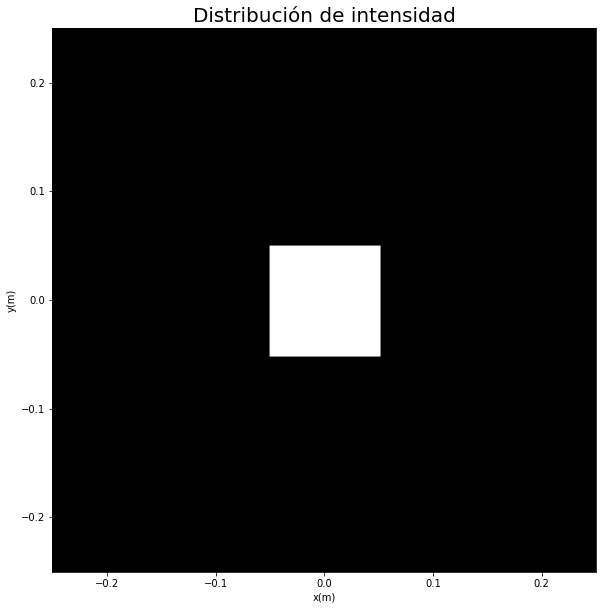

In [ ]:
#@title SQR beam example 
L1 = 0.5 #[m]
M = 250 # número de muestras 
dx1 = L1/M #Rata de muestreo 

#Sistema coord. 
x1 = np.arange(-L1/2, L1/2, dx1); y1 = x1; 

xx1, yy1 = np.meshgrid(x1,y1) #Espacio meshgrid

u1 = rect2D(xx1/(2*w))*rect2D(yy1/(2*w)) #Campo de entrada
I1 = np.abs(u1**2) #Irradiancia del campo de entrada

plt.figure(figsize=(10,10))
plt.imshow(I1, cmap='gray', extent=[-L1/2,L1/2,-L1/2,L1/2])
plt.title('Distribución de intensidad', fontsize=20)
plt.xlabel('x(m)')
plt.ylabel('y(m)')


Text(0, 0.5, 'y(m)')

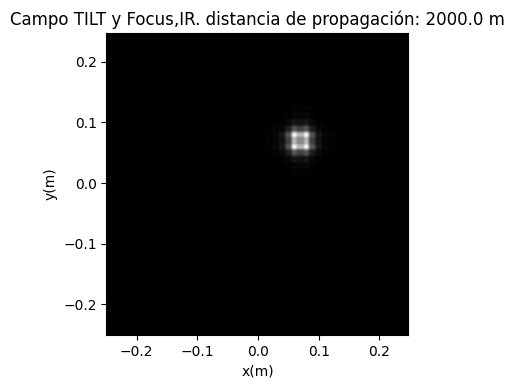

In [ ]:
#@title Aplicación del tilt y focus simultaneamente al campo de entrada. 

u1t=tilt(u1,L1,wl,z,alpha,theta)
u1=focus(u1t,L1,wl,zf)

#Intensidad y fase
I1=np.abs(u1)**2  
A1=np.angle(u1)

Hirz1=irfresnel(M,M,dx1,wl,z)
u2=convft(u1,Hirz1,dx1)

I2 = np.abs(u2)**2

plt.figure(dpi=100)
plt.imshow(I2, cmap='gray',origin='lower',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
plt.title('Campo TILT y Focus,IR. distancia de propagación: %.1f m' % z)
plt.xlabel('x(m)')
plt.ylabel('y(m)')

Text(0, 0.5, 'y(m)')

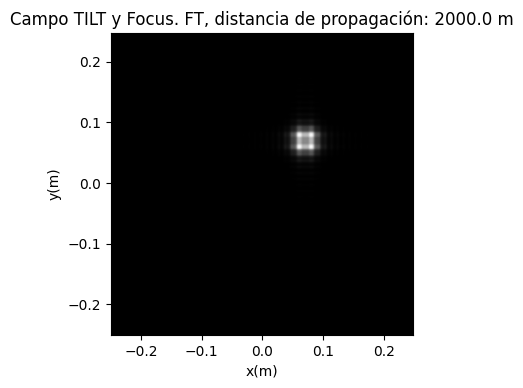

In [ ]:
#@title Función transferencia
Hftz1=ftfresnel(M,M,dx1,wl,z)
uf=convft(u1,Hftz1,dx1)

I2f = np.abs(uf)**2

plt.figure(dpi=100)
plt.imshow(I2f, cmap='gray',origin='lower',extent=[np.min(x1),np.max(x1),np.min(y1),np.max(y1)])
plt.title('Campo TILT y Focus. FT, distancia de propagación: %.1f m' % z)
plt.xlabel('x(m)')
plt.ylabel('y(m)')

Dado que estamos propagando a una distancia de $z=2000$ m, pero enfocamos a una distancia $z_f = 4000 $ m, podemos decir que hay un desenfoque. 

## Problema 6.3: 

La función de transmitancia para una lente cilindrica es: 
$$t(x,y) = exp[\frac{-ik}{2f}x^2]$$
donde $k = \frac{2\pi}{\lambda}$ es el número de onda, $\lambda$:longitud de onda.

In [ ]:
#@title lente cilindrica 
def cylindrical_lense(uin,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  #Sistema coord. 
  X, Y = np.meshgrid(x, x);
  uout =uin*np.exp(-1j*k/(2*zf)*(X**2)) #El campo de entrada producto de la exp(fase) encontrada para enfocar 
  return uout

Text(0, 0.5, 'y(m)')

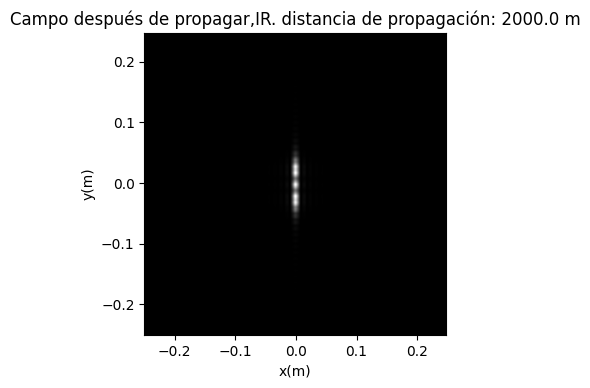

In [ ]:
#@title SQR beam example 
L = 0.5 #[m]
M = 250 # número de muestras 
dx = L/M #Rata de muestreo 

zf = 2000 # [m]
wl = 0.5e-6 #Wave lenght 


#Sistema coord. 
x = np.arange(-L/2, L/2, dx); y = x; 

xx, yy = np.meshgrid(x,y) #Espacio meshgrid

u1 = rect2D(xx/(2*w))*rect2D(yy/(2*w)) #Campo de entrada
u1_lense = cylindrical_lense(u1,L,wl,zf)

I_cylindrical = np.abs(u1_lense)**2

Hirz1=irfresnel(M,M,dx,wl,zf)
u2=convft(u1_lense,Hirz1,dx)

I2 = np.abs(u2)**2

plt.figure(dpi=100)
plt.imshow(I2, cmap='gray',extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.title('Campo después de propagar,IR. distancia de propagación: %.1f m' % z)
plt.xlabel('x(m)')
plt.ylabel('y(m)')

## Problema 6.7: 

In [ ]:
#@title Datos del problema y sistema coord. 
wl = 0.5e-6 #wavelength 
zf = 0.5 #propagation distance
P = 1e-4 #grating period 
D1 = 1.02e-3 #grating side lengt

L1 = 1e-2 
M = 500

#Sistemas coord. 
dx1 = L1/M

x1 = np.arange(-L1/2,L1/2,dx1); y1 = x1;

X1, Y1 = np.meshgrid(x1,y1)

### Parte a)


Implementar para la función de transmitancia: 

$$t_A(x,y) = exp[j\frac{\pi}{m}cos(\frac{2\pi x}{P})]rect(\frac{x}{D_1})rect(\frac{y}{D_1})$$

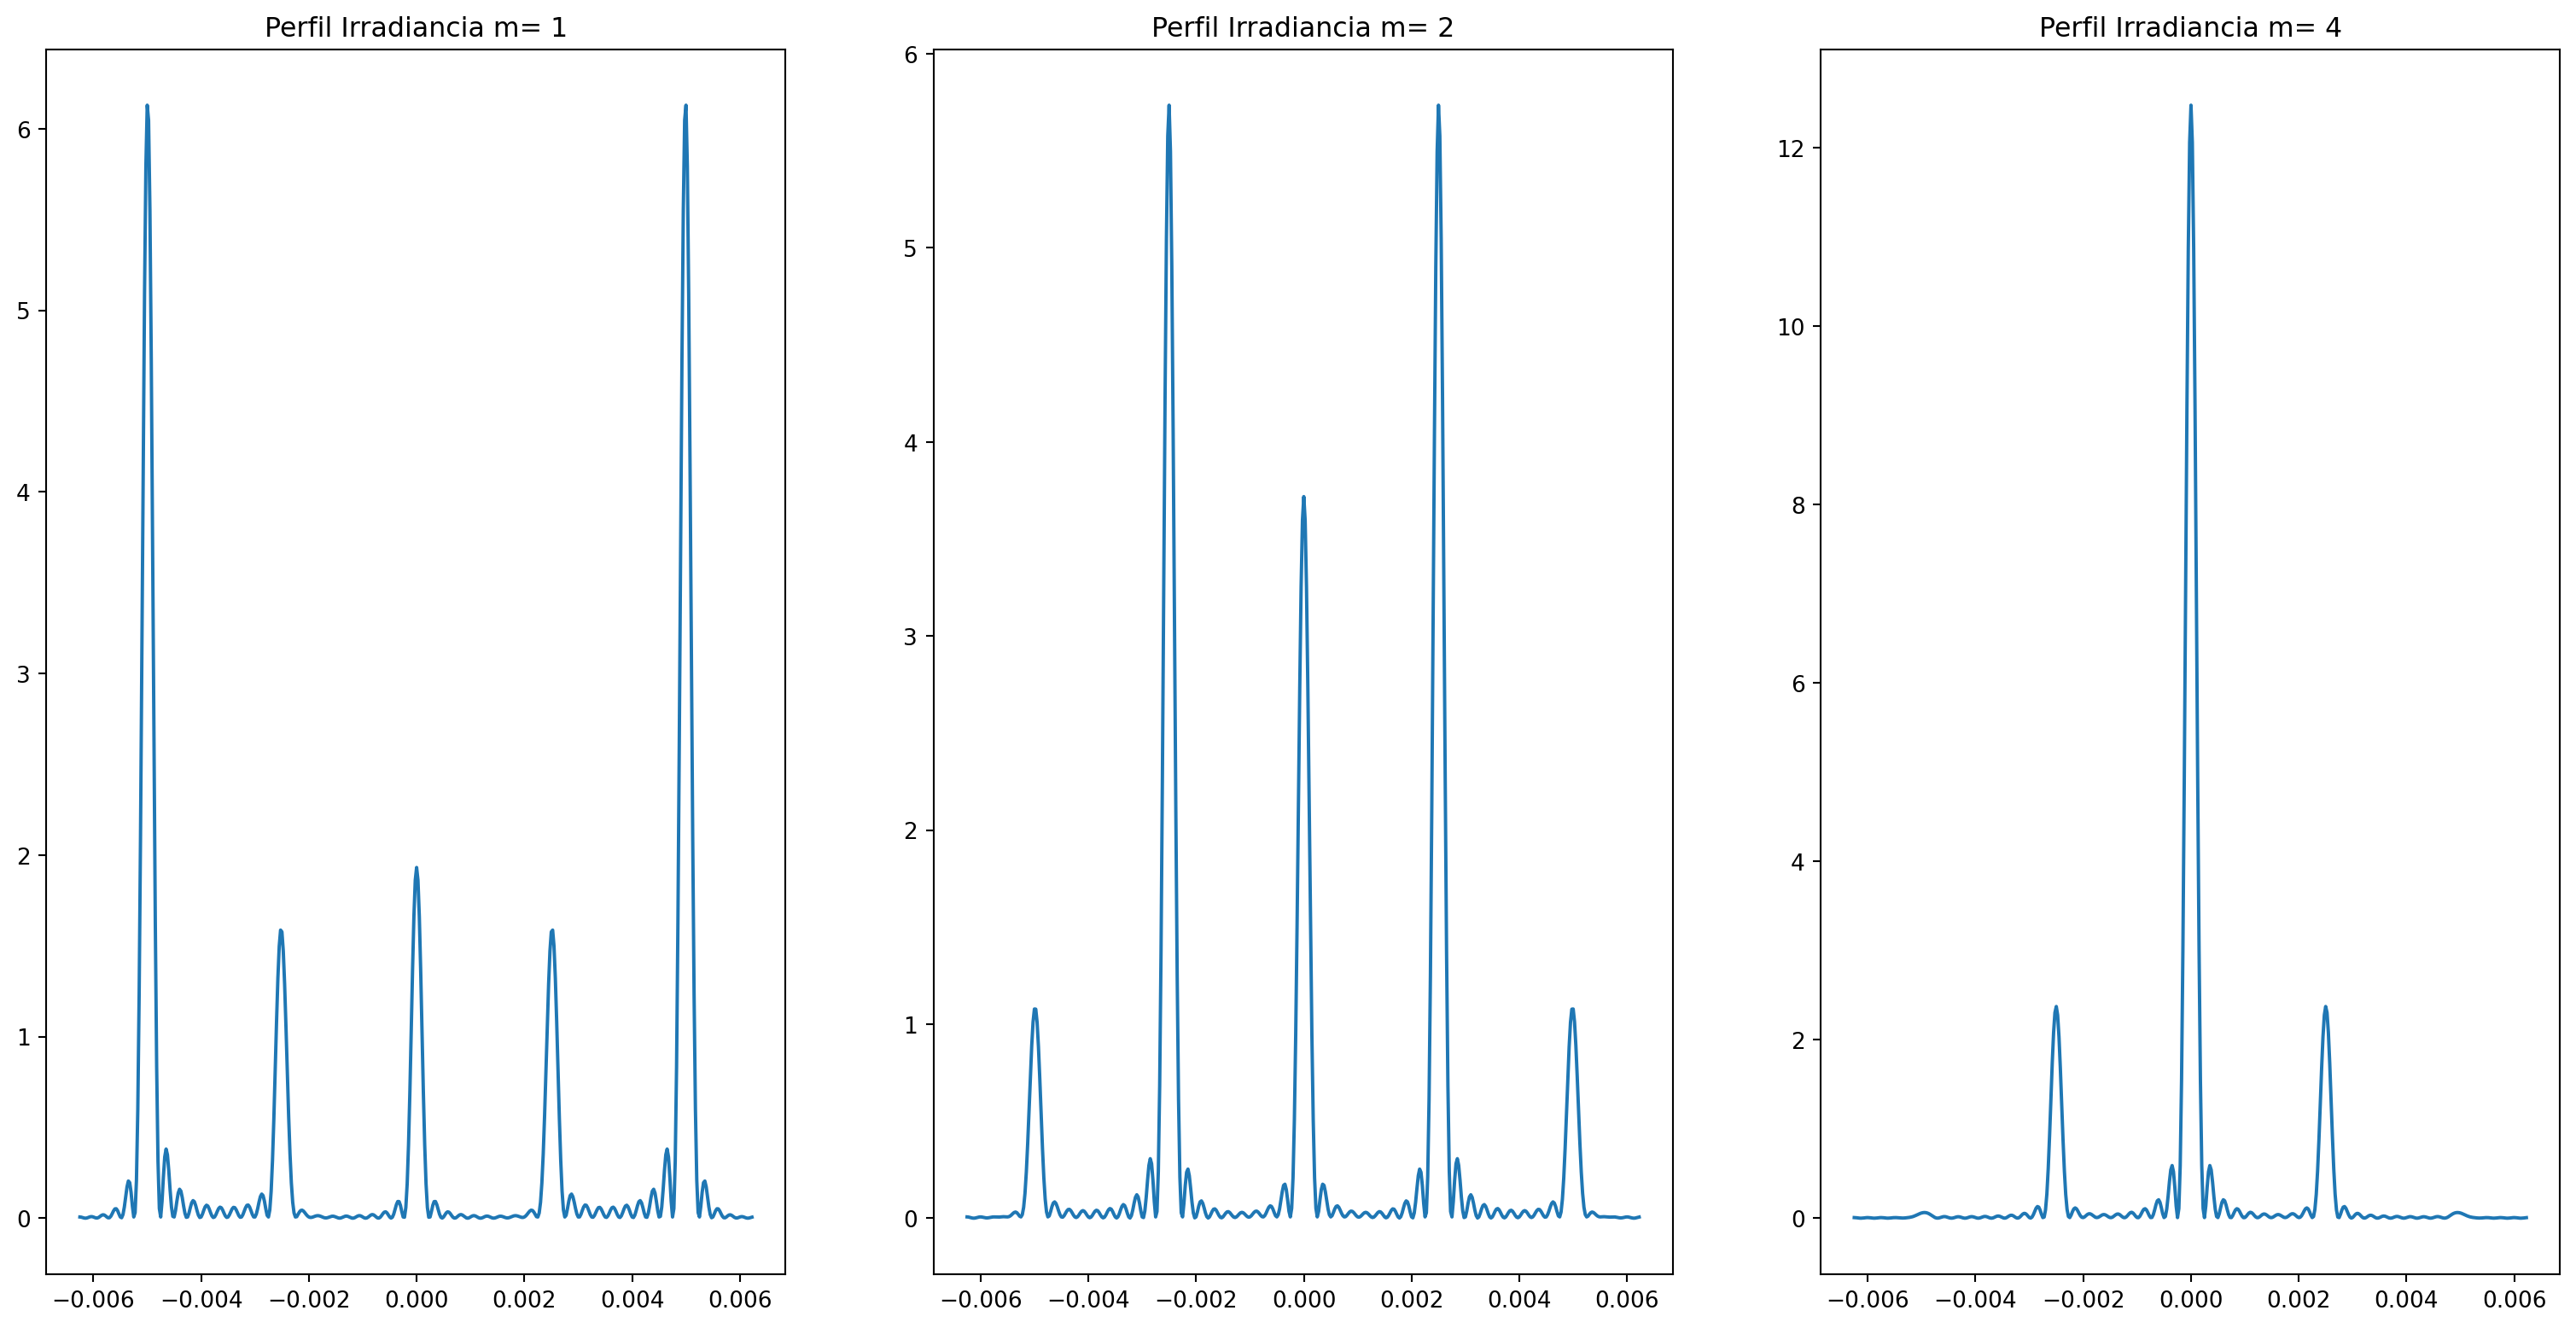

In [ ]:
#@title Graficas
#Campo de entrada
def u1(x,y,m):
  a1 = 1j*np.pi/m
  a2 = np.cos(2*np.pi*x/P)
  b1 = x/D1
  b2 = y/D1
  return np.exp(a1*a2)*rect2D(b1)*rect2D(b2)

m=np.array((1,2,4))
xg1 = np.zeros(500)
xg2 = np.zeros(500)
xg3 = np.zeros(500)

Ig1 = np.zeros(500)
Ig2 = np.zeros(500)
Ig3 = np.zeros(500)


for i in m:
  u2, L2 =  propFF(u1(X1, Y1,i), L1, wl, zf) 
  dx2 = L2/M
  x2 = np.arange(-L2/2, L2/2,dx2)
  I2 = np.abs(u2)**2
  if i==1: 
    for j in range(0,500):
      xg1[j] = x2[j]
      Ig1[j] = I2[250,:][j]
  elif i==2: 
    for k in range(0, 500):
      xg2[k] = x2[k]
      Ig2[k] = I2[250,:][k]
  elif i==4:
    for l in range(0, 500):
      xg3[l] = x2[l]
      Ig3[l] = I2[250,:][l] 

plt.rcParams['figure.figsize'] = 20,10
fig = plt.figure(dpi=190)

ax = fig.add_subplot(1, 3, 1)
ax.plot(xg1[0:501],Ig1[0:501])
ax.title.set_text('Perfil Irradiancia m= 1')
ax = fig.add_subplot(1, 3, 2)
ax.plot(xg2[0:501],Ig2[0:501])
ax.title.set_text('Perfil Irradiancia m= 2')
ax = fig.add_subplot(1, 3, 3)
ax.plot(xg3[0:501],Ig3[0:501])
ax.title.set_text('Perfil Irradiancia m= 4')

### Parte b) 

Implementamos la función de transmitancia 
$$t_A(x,y) = exp[j\frac{\pi}{m}rect(\frac{x}{P/2})*\frac{1}{P}comb(\frac{x}{P})]rect(\frac{x}{D_1})rect(\frac{y}{D_1})$$

In [ ]:
#@title Función comb
#Libro de Voelz 
def comb(x): 
  x = (np.round(x*1e6))/1e6
  out = x%1==0
  return out

def rect1D(x): 
  return abs(x)<=(1/2)

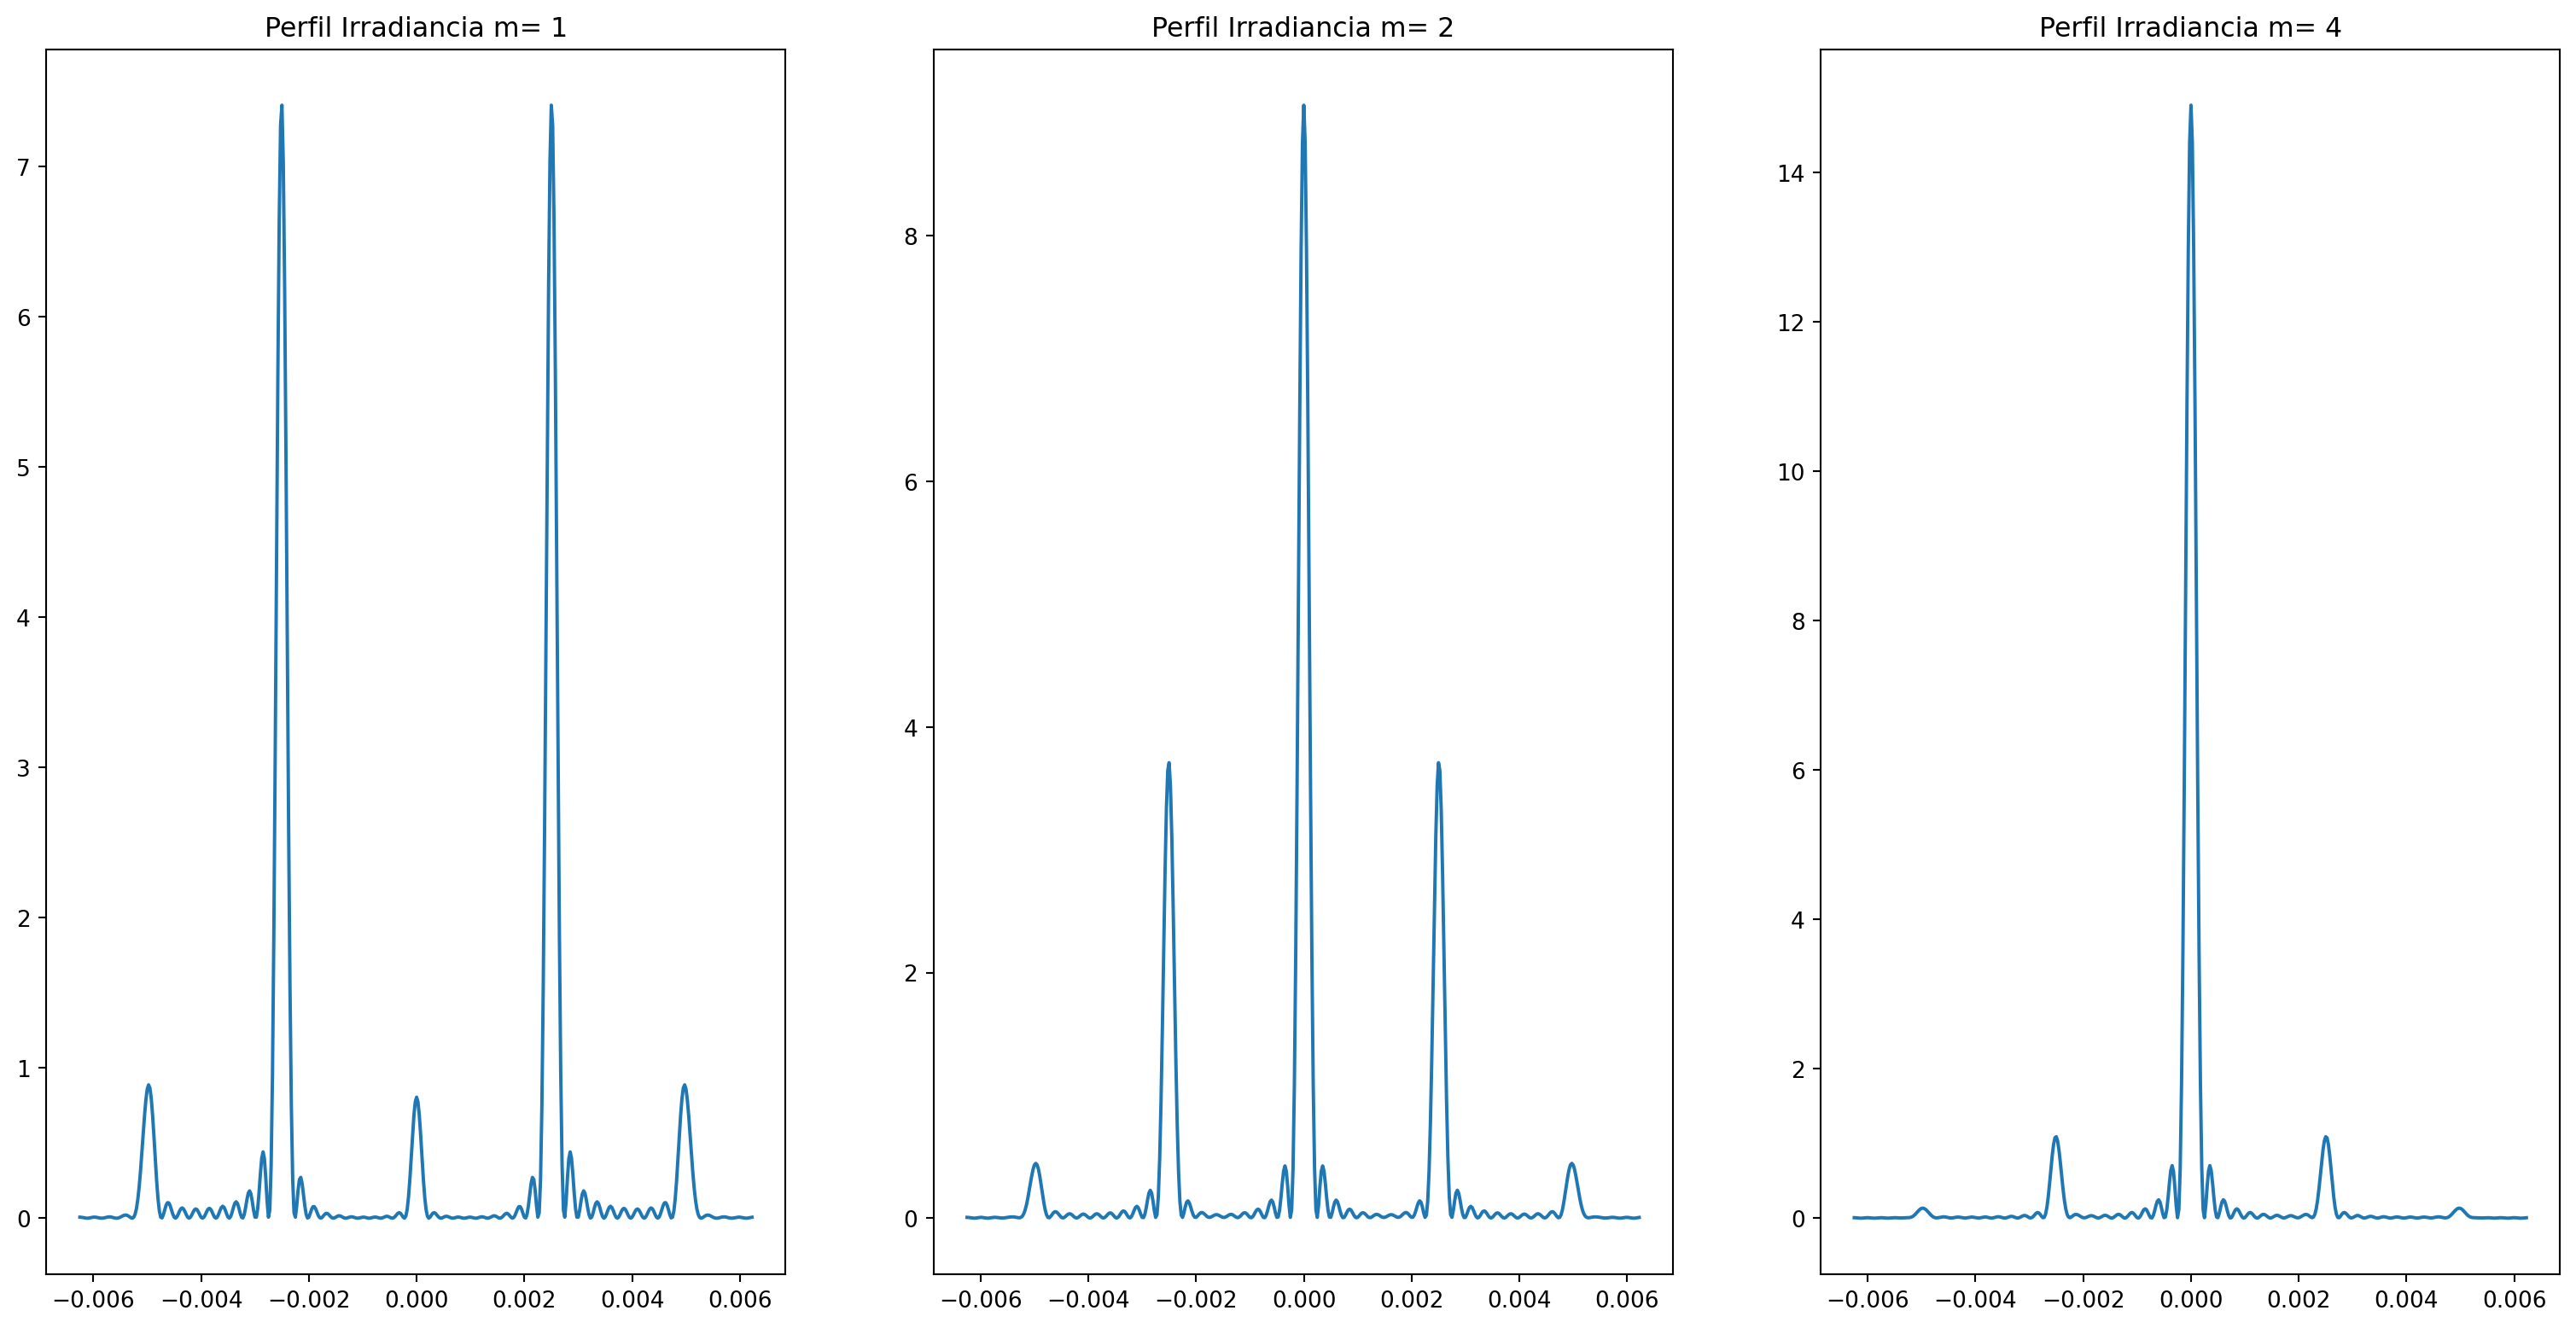

In [ ]:
#@title Graficas
#Campo de entrada

m1, m2, m3 = 1, 2, 4 
fc = (sft.fft(rect1D(X1/(P/2))))
fr = (sft.fft((comb(X1/P))))/P
ux = sft.fftshift(sft.ifft(fc*fr))*dx1 

u1 = ux/(np.max(ux))
ug1 = np.exp(1j*np.pi*u1/(m1))*rect2D(X1/D1)*rect2D(Y1/D1)
ug2 = np.exp(1j*np.pi*u1/(m2))*rect2D(X1/D1)*rect2D(Y1/D1)
ug3 = np.exp(1j*np.pi*u1/(m3))*rect2D(X1/D1)*rect2D(Y1/D1)

u2_1, L2_1 = propFF(ug1, L1, wl, zf)
u2_2, L2_2 = propFF(ug2, L1, wl, zf)
u2_3, L2_3 = propFF(ug3, L1, wl, zf)

dx2_1 = L2_1/M
dx2_2 = L2_2/M
dx2_3 = L2_3/M


x2_1 = np.arange(-L2_1/2, L2_1/2,dx2_1)
x2_2 = np.arange(-L2_2/2, L2_2/2,dx2_2)
x2_3 = np.arange(-L2_3/2, L2_3/2,dx2_3)

I2_1 = np.abs(u2_1)**2
I2_2 = np.abs(u2_2)**2
I2_3 = np.abs(u2_3)**2


plt.rcParams['figure.figsize'] = 20,10
fig = plt.figure(dpi=190)

ax = fig.add_subplot(1, 3, 1)
ax.plot(x2_1,I2_1[250,:])
ax.title.set_text('Perfil Irradiancia m= 1')
ax = fig.add_subplot(1, 3, 2)
ax.plot(x2_2,I2_2[250,:])
ax.title.set_text('Perfil Irradiancia m= 2')
ax = fig.add_subplot(1, 3, 3)
ax.plot(x2_3,I2_3[250,:])
ax.title.set_text('Perfil Irradiancia m= 4')

### Parce c)

Implementemos la función de transmitancia: 
$$t_A(x,y)= exp[j\frac{\pi}{m}\Lambda(\frac{x}{P/2})*\frac{1}{P}comb(\frac{x}{P})]rect(\frac{x}{D1})rect(\frac{y}{D1})$$

In [ ]:
#@title Función triángulo
def tri1D(x): # FUNCIÓN TRIANGULO EN 1D
    out = 1-np.abs(x)
    out[out<=0]=0
    return out
    

(500,)


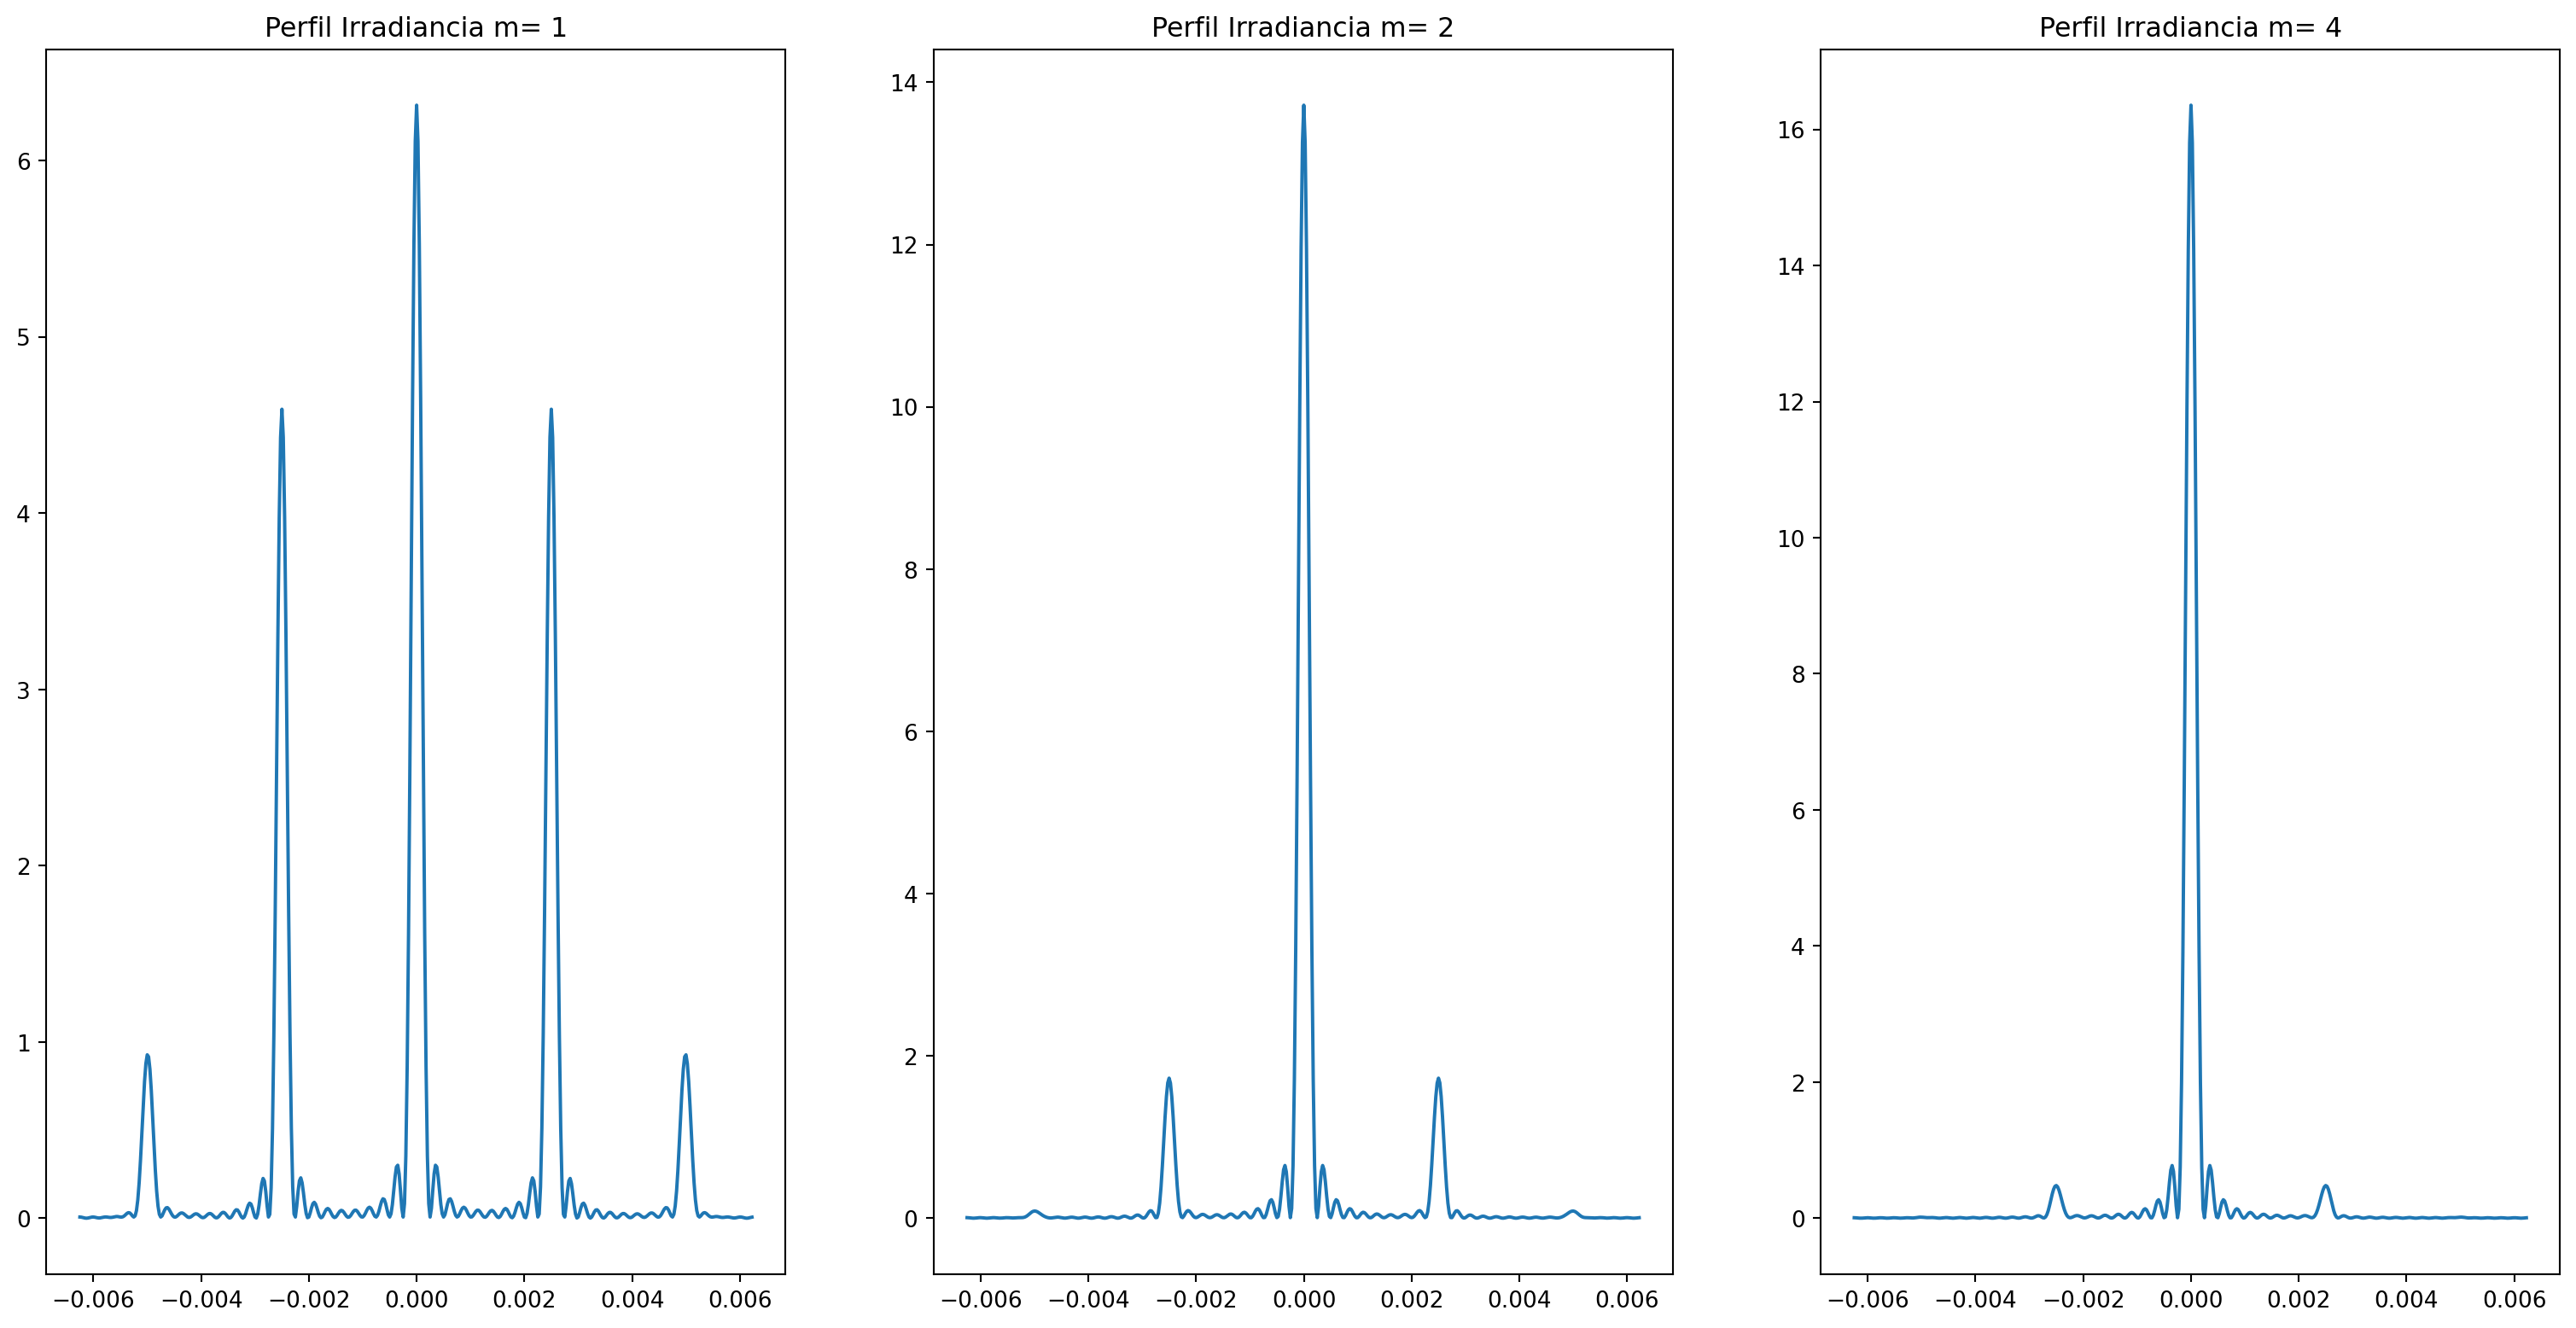

In [ ]:
#@title Graficas
#Campo de entrada
wl = 0.5e-6 #wavelength 
L1 = 1e-2 
m1, m2, m3 = 1, 2, 4
fc1 = (sft.fft(tri1D(X1/(P/2))))
fr1 = (sft.fft((comb(X1/P))))/P
ux = sft.fftshift(sft.ifft(fc1*fr1))*dx1 

u1 = ux/(np.max(ux))
ug1 = np.exp(1j*np.pi*u1/(m1))*rect2D(X1/D1)*rect2D(Y1/D1)
ug2 = np.exp(1j*np.pi*u1/(m2))*rect2D(X1/D1)*rect2D(Y1/D1)
ug3 = np.exp(1j*np.pi*u1/(m3))*rect2D(X1/D1)*rect2D(Y1/D1)

u21, L21 = propFF(ug1, L1, wl, zf)
u22, L22 = propFF(ug2, L1, wl, zf)
u23, L23 = propFF(ug3, L1, wl, zf)

dx21 = L21/M
dx22 = L22/M
dx23 = L23/M

x21 = np.arange(-L21/2, L21/2,dx21)
x22 = np.arange(-L22/2, L22/2,dx22)
x23 = np.arange(-L23/2, L23/2,dx23)

print(np.shape(x21))
I21 = np.abs(u21)**2
I22 = np.abs(u22)**2
I23 = np.abs(u23)**2



plt.rcParams['figure.figsize'] = 20,10
fig = plt.figure(dpi=190)

ax = fig.add_subplot(1, 3, 1)
ax.plot(x21,I21[250,:])
ax.title.set_text('Perfil Irradiancia m= 1')
ax = fig.add_subplot(1, 3, 2)
ax.plot(x22,I22[250,:])
ax.title.set_text('Perfil Irradiancia m= 2')
ax = fig.add_subplot(1, 3, 3)
ax.plot(x23,I23[250,:])
ax.title.set_text('Perfil Irradiancia m= 4')

## Punto 7.4: 

Asuma: 
$$z_{xp}= 50 mm$$
$$\lambda = 0.5um$$
y una pupila exterior con un radio de $w_o = 1$ mm y un radio interior de $w_i = 0.5$ mm. Use $L= 1$ mm y $M=250$

### Parte a) 
Cuáles son las frecuencias de corte coherentes e incoherentes? 
Tanto en el caso coherente como en el caso incoherente las frecuencias de corte son iguales, pero se suele tomar de la siguiente forma: 

Coherente --> $f_o = \frac{w_{xp}}{\lambda z_{xp}}$

Incoherete --> $2f_o = 2\frac{w_{xp}}{\lambda z_{xp}}$
* Caso coherente: 
$f_o = \frac{1 mm}{(0.5^{-3} mm)(50mm)} = 40 \frac{cycles}{mm}$

* Caso incoherente: 
$2f_o =2\frac{1 mm}{(0.5^{-3} mm)(50mm)} = 80 \frac{cycles}{mm}$



### Parte b) 
Desarrolle una simulación para una imagen de prueba limitada por difracción. Presente un gráfico de superficie de la función de transferencia coherente y la imagen coherente simulada. 

In [ ]:
def circ(x): # FUNCION circulo EN 2D
        s=np.zeros(x.shape)
        s[(x)<1]=1.0
        return s

In [ ]:
from skimage import io
from PIL import Image as im
import scipy.fft as sft
import matplotlib.pyplot as plt


# Código de Google Colaboratory para subir el archivo y trabajar con él
from google.colab import drive 
drive.mount('/content/gdrive')
!cp '/content/gdrive/My Drive/Colab Notebooks/6.bmp' '6.bmp'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Text(0.5, 0, 'x (m)')

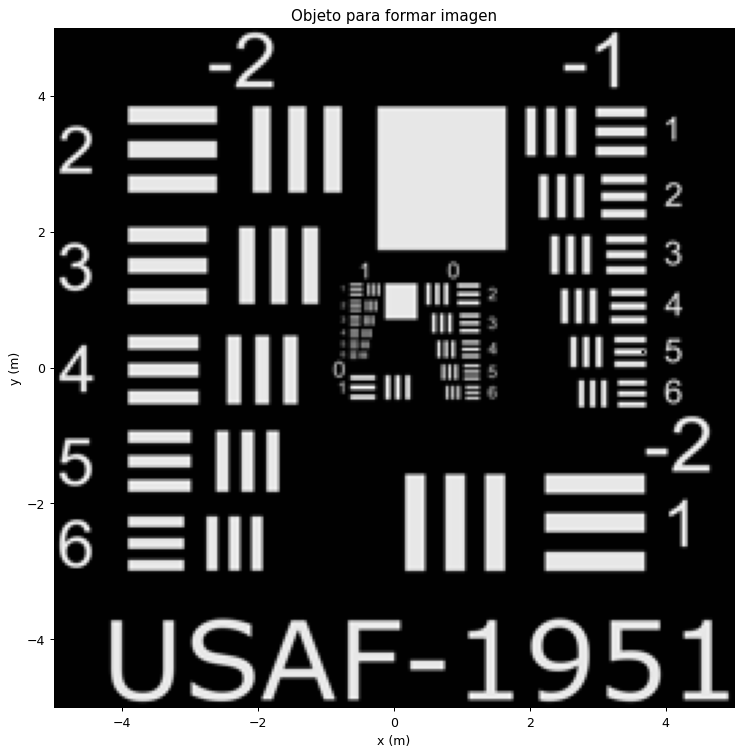

In [ ]:
#@title Datos e imagen
zxp = 50e-3 
wl = 0.5e-6
wo = 1e-3
wi = 0.5e-3
L =1e-3
M = 250
dx= L/M

fo_1 = wo/(wl*zxp)
fo_2 = wi/(wl*zxp)

x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fxx,fyy=np.meshgrid(fx,fy)

I =im.open('6.bmp')
I=I.resize([M,M])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I=I-np.min(np.min(I))
ug = np.sqrt(I)


plt.figure(dpi=90)
plt.imshow(I, cmap='gray',extent=[-L/2*1E4,L/2*1E4,-L/2*1E4,L/2*1E4])
plt.title('Objeto para formar imagen')
plt.ylabel('y (m)')
plt.xlabel('x (m)')



Text(0.5, 0, '$f_x$ $(10^5$ $cyc/m)$')

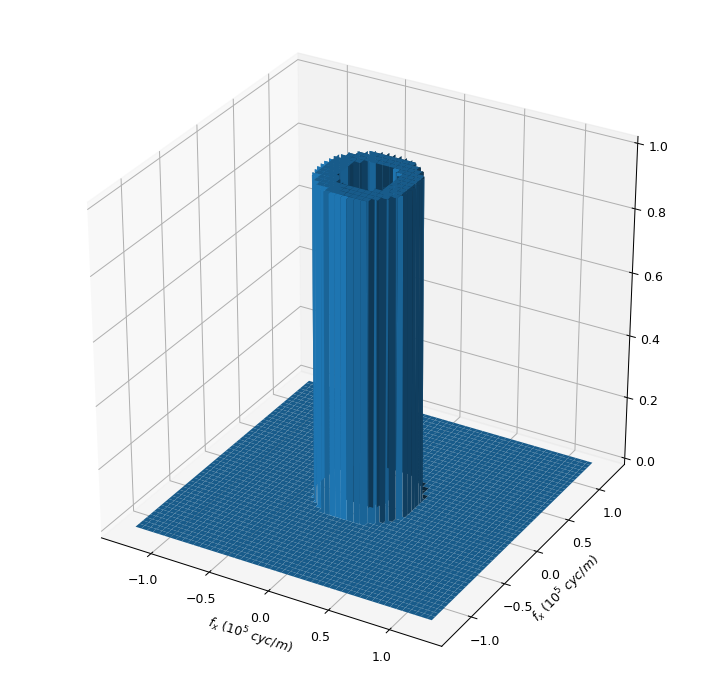

In [ ]:
#@title función de transferencia coherente 
H=circ(np.sqrt(fxx**2+fyy**2)/fo_1) - circ(np.sqrt(fxx**2+fyy**2)/fo_2)

fig = plt.figure(dpi=90)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(fxx*1E-5,fyy*1E-5,np.abs(H))
ax.set_xlabel('$f_x$ $(10^5$ $cyc/m)$')
ax.set_ylabel('$f_x$ $(10^5$ $cyc/m)$')

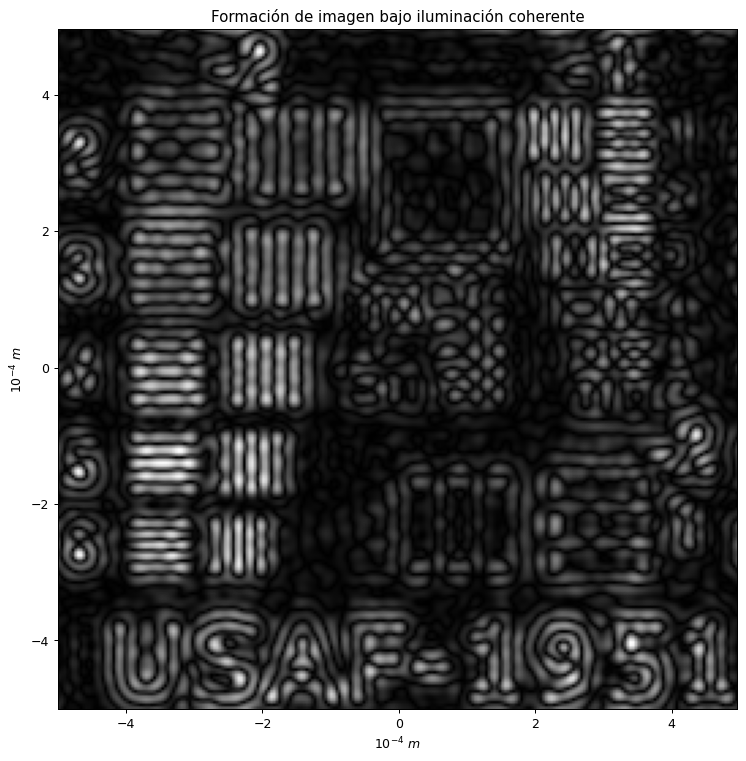

In [ ]:
#@title caso coherente
Hs=sft.fftshift(H)
ui=convft(ug,Hs,dx)
Ii=np.abs(ui)**2

fig = plt.figure(dpi=90)
plt.imshow((Ii)**(1/2), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Formación de imagen bajo iluminación coherente')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

### Parce c): Caso incoherente 

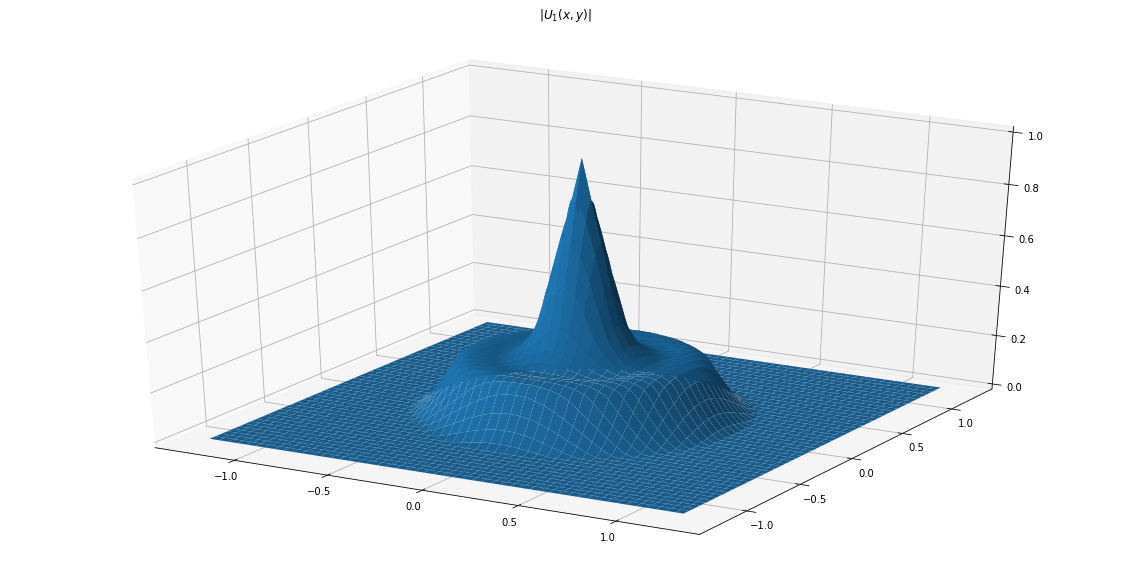

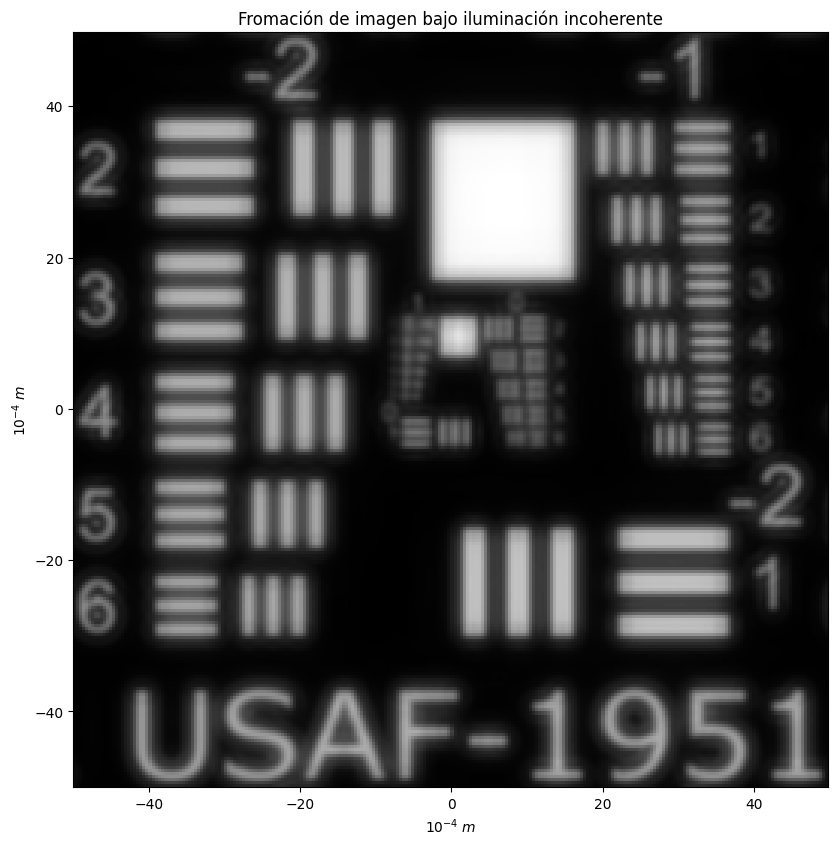

In [ ]:
#@title Caso incoherente
OTF=sft.ifft2(np.abs(sft.fft2(sft.fftshift(H)))**2)
OTF=np.abs(OTF/OTF[0,0])

Gg=sft.fft2(sft.fftshift(I))
Gi=Gg*OTF
Ii=sft.ifftshift(sft.ifft2(Gi))
Ii=np.abs(Ii)

OTF=sft.fftshift(OTF)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(fxx*1E-5,fyy*1E-5,np.abs(OTF))
ax.title.set_text('$|U_1(x,y)|$')



plt.rcParams['figure.figsize'] = 10,10
fig = plt.figure(dpi=100)
plt.imshow((Ii), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Fromación de imagen bajo iluminación incoherente')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

### Parte d) 
¿Cuál es el efecto de perder el DC y la baja frecuencia espacial con la función de transferencia coherente?

**R//** Una de las razones por las cuales no se hace formación de imagen con luz coherente es porque se generan patrones de speckle ya que cada punto del objeto al incidir la luz tiene la misma fase. En la imagen que tenemos podemos notar que la información del orden central se filtro(se filtraron las frecuencias bajas) y solamente paso la información debida a frecuencias altas, por esto es que solo podemos distinguir la imagen por los bordes de ésta.  
